In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import sys
import os

In [4]:
import matplotlib.pyplot as plt

class TrainingVisualizer:
    def __init__(self, history):
        self.history = history

    def plot_accuracy(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_loss(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_learning_rate(self):
        if 'lr' in self.history.history:
            plt.figure(figsize=(8, 6))
            plt.plot(self.history.history['lr'], label='Learning Rate')
            plt.title('Learning Rate')
            plt.xlabel('Epoch')
            plt.ylabel('Learning Rate')
            plt.legend()
            plt.grid(True)
            plt.show()


In [5]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    print("GPU is available and will be used for training.")
else:
    print("No GPU available, training on CPU.")

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data (Reshape and normalization)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255



Num GPUs Available:  0
No GPU available, training on CPU.


c:\Users\sysad\Project\DigitRecognitionApp\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                                      patience=3, 
                                                      verbose=1, 
                                                      factor=0.5, 
                                                      min_lr=0.00001)

c:\Users\sysad\Project\DigitRecognitionApp\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
epochs = 30 
batch_size = 86

# With data augmentation to prevent overfitting.
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_images)

Epoch 1/30


c:\Users\sysad\Project\DigitRecognitionApp\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


698/698 - 17s - 25ms/step - accuracy: 0.9016 - loss: 0.3105 - val_accuracy: 0.9795 - val_loss: 0.0621 - learning_rate: 0.0010
Epoch 2/30
698/698 - 17s - 25ms/step - accuracy: 0.9748 - loss: 0.0815 - val_accuracy: 0.9886 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 3/30
698/698 - 16s - 23ms/step - accuracy: 0.9814 - loss: 0.0575 - val_accuracy: 0.9922 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 4/30
698/698 - 16s - 23ms/step - accuracy: 0.9859 - loss: 0.0472 - val_accuracy: 0.9927 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 5/30
698/698 - 17s - 25ms/step - accuracy: 0.9879 - loss: 0.0414 - val_accuracy: 0.9945 - val_loss: 0.0158 - learning_rate: 0.0010
Epoch 6/30
698/698 - 21s - 30ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9939 - val_loss: 0.0177 - learning_rate: 0.0010
Epoch 7/30
698/698 - 21s - 30ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9948 - val_loss: 0.0189 - learning_rate: 0.0010
Epoch 8/30
698/698 - 20s - 29ms/step - accuracy: 0.9

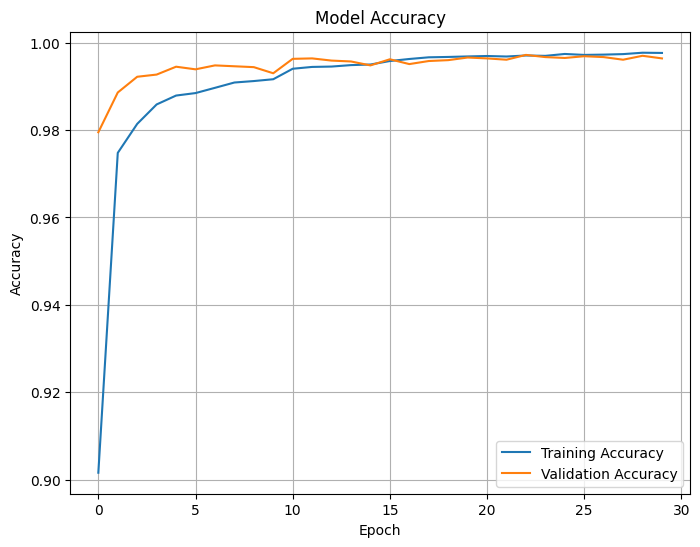

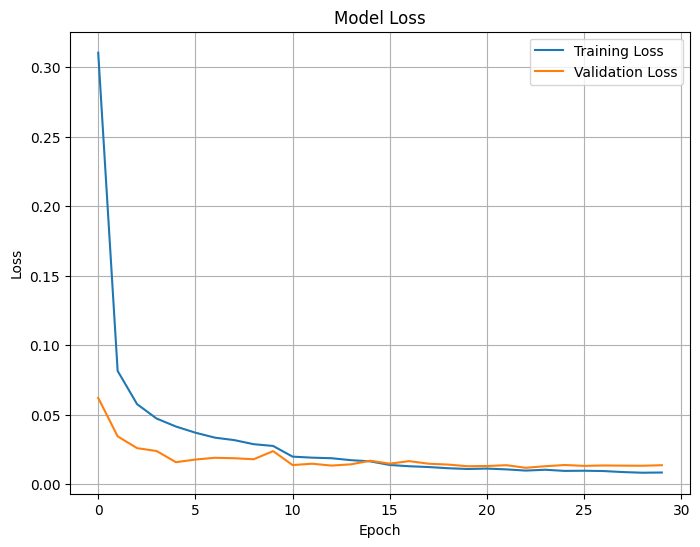

In [7]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs, validation_data=(test_images, test_labels), 
                    callbacks=[learning_rate_reduction], verbose=2)

# Save the model
model.save('digit_recognition_model.keras')
# Visualize the training process
visualizer = TrainingVisualizer(history)
visualizer.plot_accuracy()
visualizer.plot_loss()
visualizer.plot_learning_rate()

In [17]:
import tensorflow as tf

# Set memory growth on GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [14]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2198181483763031228
xla_global_id: -1
]
